In [1]:
import numpy as np
import pandas as pd
import time
from IPython.display import clear_output

import itertools
import scipy

import matplotlib.pyplot as plt
import matplotlib.animation as animation

import heapq

from scipy.optimize import curve_fit

import pickle 

In [2]:
# m1 = pd.read_table("dump1.graphene", skiprows=2, sep='\s+',
#                          names=['atom_number', 'atom_type', 'x', 'y', 'z', 'rand1', 'rand2'])
# m1 = m1.dropna(subset=["z"])
# m1 = m1[m1['rand1'].isna()]
# m1 = m1[["atom_number","x","y","z"]] 

# # print(m1.iloc[0:700])
# nid = m1.values[:,0].reshape(680,100)
# x   = m1.values[:,1].reshape(680,100)
# y   = m1.values[:,2].reshape(680,100)
# z   = m1.values[:,3].reshape(680,100)


In [33]:
# plt.plot(m1.iloc[0:680]["x"],m1.iloc[0:680]["y"],'.r')
# min(m1.iloc[0:680]["x"])

In [70]:
Natoms = 6240 #6240 #680

m1 = pd.read_table("L-2.xyz", skiprows=2, sep='\s+',
                         names=['atom_type', 'x', 'y', 'z'])
m1 = m1.dropna(subset=["z"])
print(len(m1)/Natoms, "Frames")
print(m1.iloc[0:10])
m1 = m1[["x","y","z"]] 

# arr = m1.values.reshape(Natoms, 3, 350)

# print(m1.iloc[0:700])
# nid = m1.values[:,0].reshape(Natoms,100)
x0   = m1["x"].values.astype(np.float64).reshape(int(len(m1)/Natoms),Natoms)
y0   = m1["y"].values.astype(np.float64).reshape(int(len(m1)/Natoms),Natoms)
z0   = m1["z"].values.astype(np.float64).reshape(int(len(m1)/Natoms),Natoms)

121.0 Frames
  atom_type     x        y    z
0         1     0  1.42028  0.0
1         1  1.23  3.55070  0.0
2         1     0  0.00000  0.0
3         1  1.23  2.13042  0.0
4         1  2.46  1.42028  0.0
5         1  3.69  3.55070  0.0
6         1  2.46  0.00000  0.0
7         1  3.69  2.13042  0.0
8         1  4.92  1.42028  0.0
9         1  6.15  3.55070  0.0


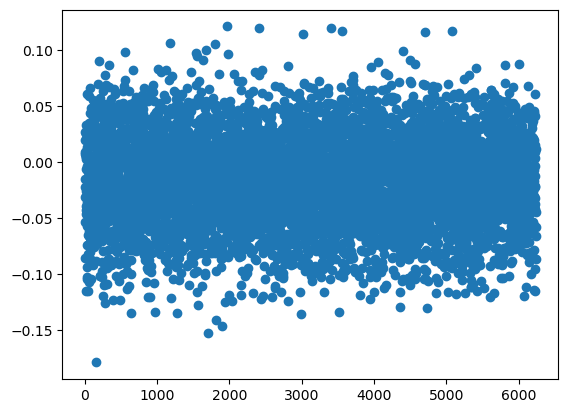

In [71]:
plt.plot(z0[20,:], 'o')

In [72]:
# def update(f):    
#     line.set_data(x0[f,:], y0[f,:])
#     if f > 19:
#         line.set_color('red') 
#     # plt.axis("square") 
#     return line,

# fig, ax = plt.subplots(figsize=(10, 10))

# line, = ax.plot(x0[0,:], y0[0,:], '.b', markersize=6.) 

# ani = animation.FuncAnimation(fig, update, frames=np.shape(x0)[0] , interval=1)

# # plt.axis("square") 
# plt.xlim(-10, 52)#(-15, 140)  # Set x-axis limits
# plt.ylim(-10, 52)#(-15, 140)  # Set y-axis limits
# plt.plot(1e3, 1e3, 'r.', markersize=6.)
# plt.title("Graphene under Uniaxial Tension from 0 to 30% strain", fontsize=20)
# plt.legend(["Finding Equilibrium in NPT", "Tensile Test"], fontsize=15, loc="upper right")
# plt.xlabel("x (Å)", fontsize=24)
# plt.ylabel("y (Å)", fontsize=24)
# plt.tight_layout()
# ax.tick_params(axis='both', labelsize=20)

# ani.save("xlmn.gif", writer="pillow", fps=10)

# plt.show()

In [73]:
## print(np.shape(x))
# x   = m1["x"][(m1.x.values.astype(np.float64) <= 30.0) & (m1.x.values.astype(np.float64) >= 10.0)].values.astype(np.float64)
print(np.shape(x0)) 

subdom = [(x0[0,:]<=120.0) & (x0[0,:]>=10.0) & (y0[0,:]<=120.0) & (y0[0,:]>=10.0)][0]
# # print(np.sum(subdom),np.shape(subdom))

x = x0[:, subdom]
y = y0[:, subdom]
z = z0[:, subdom]

# x = m1["x"][(m1["x"].values.astype(np.float64) <= 30.0) & 
#             (m1["x"].values.astype(np.float64) >= 10.0)].values.astype(np.float64)

(121, 6240)


In [74]:
# def update(f):    
#     line.set_data(x[f,:], y[f,:])
#     if f > 19:
#         line.set_color('red') 
#     return line,

# fig, ax = plt.subplots(figsize=(8, 6))

# line, = ax.plot(x[0,:], y[0,:], '.b', markersize=2.) 

# ani = animation.FuncAnimation(fig, update, frames=np.shape(x)[0] , interval=1)

# # plt.axis("square")
# plt.xlim(0, 130)  # Set x-axis limits
# plt.ylim(0, 130)  # Set y-axis limits
# plt.title("Graphene under Uniaxial Tension (Domain of Interest)", fontsize=20)
# plt.xlabel("x (Å)")
# plt.ylabel("y (Å)")

# plt.plot(1e3, 1e3, 'r.', markersize=2.)
# plt.legend(["Finding Equilibrium in NPT", "Tensile Test"], fontsize=15, loc="lower right", bbox_to_anchor=(1, -0.4))
# plt.xlabel("x (Å)", fontsize=24)
# plt.ylabel("y (Å)", fontsize=24)
# ax.tick_params(axis='both', labelsize=20)

# ani.save("animated-focus.gif", writer="pillow", fps=10)

# plt.show()

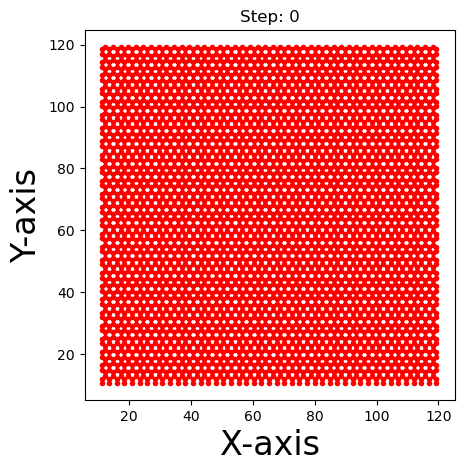

In [75]:
nstep = 1 #np.shape(x)[0] 
# plt.plot(x[nstep,:],y[nstep,:],'.r')
# plt.axis('square')

for i in range(0, nstep):
    clear_output(wait=True)  # Clears the previous output in the notebook


    # plt.clf()  # Clear the current figure
    plt.plot(x[i,:], y[i,:], '.r')  # Plot up to the i-th point
    # plt.xlim(-15, 55)  # Set x-axis limits
    # plt.ylim(-15, 55)  # Set y-axis limits
    plt.axis("square")
    plt.title("Step: " + str(i))
    plt.xlabel("X-axis", fontsize=24)
    plt.ylabel("Y-axis", fontsize=24) 
    
    # Pause for 0.2 seconds before showing the next step
    plt.pause(0.001)

# Show the final plot
plt.show()

In [76]:
print(np.shape(x))

frame0 = 19

a=(max(x[frame0,:])-min(x[frame0,:]))
b=(max(x[-1,:])-min(x[-1,:]))
eps1 = (b-a)/a
print(a,b,eps1) 

a=(max(y[frame0,:])-min(y[frame0,:]))
b=(max(y[-1,:])-min(y[-1,:]))
eps2 = (b-a)/a
print(a,b,eps2) 

a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
b10 = np.mean(heapq.nlargest(3, y[-1,:])) - np.mean(heapq.nsmallest(3, y[-1,:])) 
eps3 = (b10-a10)/a10
print(a10,b10,eps3) 

nu1 = - eps2/eps1
nu2 = - eps3/eps1

print(nu1, "vs", nu2)

(121, 4584)
108.4372 119.66649 0.10355569859789805
108.9296 107.28359999999999 -0.015110676987705829
108.88196666666666 107.2672 -0.014830432587704183
0.14591835304380382 vs 0.14321213403513466


In [77]:
# print(m1["x"].values.reshape(350,680))
# np.array([x[0,0:5],y[0,0:5]])

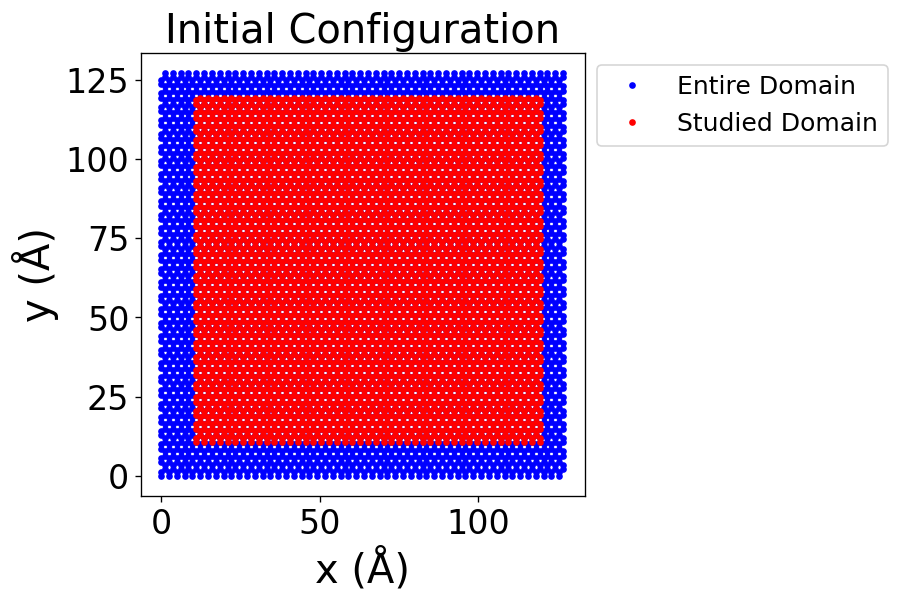

In [116]:
frame = 0

npts = Natoms 

plt.figure(dpi=120)
plt.plot(x0[frame,0:npts], y0[frame,0:npts], '.b', label="Entire Domain")  # Plot up to the i-th point
plt.plot(x[frame,0:npts], y[frame,0:npts], '.r', label="Studied Domain")  # Plot up to the i-th point
# plt.xlim(-5, 45)  # Set x-axis limits
# plt.ylim(-5, 45)  # Set y-axis limits
plt.axis("square")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=15)  # Legend outside
# plt.title("Frame #: " + str(frame+1))
plt.title("Initial Configuration", fontsize=24)
plt.xlabel("x (Å)", fontsize=24)
plt.ylabel("y (Å)", fontsize=24)
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
plt.savefig("dom.png")


In [79]:
def largest_triangle_side(t):
    # Calculate side lengths using the distance formula
    side_a = np.sqrt((t[1,0] - t[0,0])**2 + (t[1,1] - t[0,1])**2)  # Between (x1, y1) and (x2, y2)
    side_b = np.sqrt((t[2,0] - t[1,0])**2 + (t[2,1] - t[1,1])**2)  # Between (x2, y2) and (x3, y3)
    side_c = np.sqrt((t[0,0] - t[2,0])**2 + (t[0,1] - t[2,1])**2)  # Between (x3, y3) and (x1, y1)
    
    # Return the largest side
    return max(side_a, side_b, side_c)
    
def triangle_area(t):
    return 0.5 * abs(t[0,0] * (t[1,1] - t[2,1]) + t[1,0] * (t[2,1] - t[0,1]) + t[2,0] * (t[0,1] - t[1,1]))

def is_point_inside_triangle(p, tri):
    """Check if point p (x, y) is inside triangle tri [(x1, y1), (x2, y2), (x3, y3)] using barycentric coordinates."""
    x, y = p
    x1, y1, x2, y2, x3, y3 = tri.flatten()

    # Compute barycentric coordinates
    detT = (x2 - x1) * (y3 - y1) - (x3 - x1) * (y2 - y1)
    alpha = ((x2 - x) * (y3 - y) - (x3 - x) * (y2 - y)) / detT
    beta = ((x3 - x) * (y1 - y) - (x1 - x) * (y3 - y)) / detT
    gamma = 1 - alpha - beta
    
    return (0 <= alpha <= 1) and (0 <= beta <= 1) and (0 <= gamma <= 1)

def ensure_outward_normal(midpoint, normal, centroid):
    """ Flips normal if it points towards the centroid """
    to_centroid = centroid - midpoint
    dot_product = np.dot(to_centroid, normal)
    return normal if dot_product < 0 else -normal 

def compute_unit_vectors(t):
    
    x1, y1, x2, y2, x3, y3 = t.flatten()
    
    # Define edges as vectors
    edge1 = np.array([x2 - x1, y2 - y1])  # Edge from (x1, y1) to (x2, y2)
    edge2 = np.array([x3 - x2, y3 - y2])  # Edge from (x2, y2) to (x3, y3)
    edge3 = np.array([x1 - x3, y1 - y3])  # Edge from (x3, y3) to (x1, y1)
    
    # DO NOT Normalize edges to get unit vectors
    unit1 = edge1 #/ np.linalg.norm(edge1)
    unit2 = edge2 #/ np.linalg.norm(edge2)
    unit3 = edge3 #/ np.linalg.norm(edge3)

    # Compute outward-facing normal vectors (perpendiculars rotated 90° counterclockwise)
    normal1 = np.array([-unit1[1], unit1[0]])  # Rotate by 90 degrees
    normal2 = np.array([-unit2[1], unit2[0]])
    normal3 = np.array([-unit3[1], unit3[0]])

    # Compute centroid of the triangle
    centroid = np.array([(x1 + x2 + x3) / 3, (y1 + y2 + y3) / 3])

    # Compute midpoints of edges
    mid1 = np.array([(x1 + x2) / 2, (y1 + y2) / 2])
    mid2 = np.array([(x2 + x3) / 2, (y2 + y3) / 2])
    mid3 = np.array([(x3 + x1) / 2, (y3 + y1) / 2])

    # Adjust normals to ensure outward direction
    normal1 = ensure_outward_normal(mid1, normal1, centroid)
    normal2 = ensure_outward_normal(mid2, normal2, centroid)
    normal3 = ensure_outward_normal(mid3, normal3, centroid)    
    
    # return np.array([unit1, unit2, unit3, normal1, normal2, normal3, mid1, mid2, mid3])
    return np.array([[unit1, unit2, unit3], [normal1, normal2, normal3], [mid1, mid2, mid3]])

# def find_triangles_with_internal_points(points):
#     """Find all triangles containing at least one additional internal point."""
#     triangles_with_internal_points = []
#     tri = scipy.spatial.Delaunay(points)  # Generate a triangulation of the points
    
#     max_area_allowed = 3 * 1.42*np.sqrt(3)/2 * 1.42/2 
#     max_len_allowed  = 3
    
#     # for i in np.arange(0,679):
#         # print(points[tri.simplices[i]])
#         # if largest_triangle_side(points[tri.simplices[i]]) <= max_len_allowed:
#             # plt.triplot(points[i, 0], points[i, 1], points[tri.simplices], color='blue')
#             # plt.plot(points[tri.simplices[i,0]], points[tri.simplices[i,1]], color='blue')
#             # plt.scatter(points[:, 0], points[:, 1], color='red')
#             # plt.xlim(-5, 45)  # Set x-axis limits
#             # plt.ylim(-5, 45)  # Set y-axis limits
#             # plt.show() 
#             # plt.pause(0.1)

#     for simplex in tri.simplices:  # Iterate through all triangles
#         triangle = points[simplex]  # Get triangle vertices
#         if largest_triangle_side(triangle) <= max_len_allowed: # triangle_area(triangle) <= 1.2 * max_area_allowed and 
#             # print((triangle))
    
#             e_i = compute_unit_vectors(triangle)
#             # print(e_i)
#             # print(e_i[0][0], e_i[0][1]) 
#             # print(e_i[1][0], e_i[1][1])
#             # print(e_i[2][0], e_i[2][1])

#             fact = 6
            
#             clear_output(wait=True)  # Clears the previous output in the notebook
#             plt.plot(triangle[:,0], triangle[:,1], '.r')  # Plot up to the i-th point
            
#             plt.plot([triangle[0,0], triangle[0,0]+fact*e_i[0][0]], [triangle[0,1] , triangle[0,1]+fact*e_i[0][1]], '-b') 
#             plt.plot([triangle[1,0], triangle[1,0]+fact*e_i[1][0]], [triangle[1,1] , triangle[1,1]+fact*e_i[1][1]], '-b') 
#             plt.plot([triangle[2,0], triangle[2,0]+fact*e_i[2][0]], [triangle[2,1] , triangle[2,1]+fact*e_i[2][1]], '-b') 
            
#             plt.plot([triangle[0,0], triangle[0,0]+fact*e_i[3][0]], [triangle[0,1] , triangle[0,1]+fact*e_i[3][1]], '-g') 
#             plt.plot([triangle[1,0], triangle[1,0]+fact*e_i[4][0]], [triangle[1,1] , triangle[1,1]+fact*e_i[4][1]], '-g') 
#             plt.plot([triangle[2,0], triangle[2,0]+fact*e_i[5][0]], [triangle[2,1] , triangle[2,1]+fact*e_i[5][1]], '-g') 

#             # plt.plot([e_i[6][0], e_i[6][0]+fact*e_i[3][0]], [e_i[6][1] , e_i[6][1]+fact*e_i[3][1]], '-g') 
#             # plt.plot([e_i[7][0], e_i[7][0]+fact*e_i[4][0]], [e_i[7][1] , e_i[7][1]+fact*e_i[4][1]], '-g') 
#             # plt.plot([e_i[8][0], e_i[8][0]+fact*e_i[5][0]], [e_i[8][1] , e_i[8][1]+fact*e_i[5][1]], '-g') 
            
#             plt.xlim(-5, 45)  # Set x-axis limits
#             plt.ylim(-5, 45)  # Set y-axis limits
#             plt.pause(0.1) 
            
#             # Check all other points to see if any is inside the current triangle
#             for i, p in enumerate(points):
#                 # clear_output(wait=True)  # Clears the previous output in the notebook
#                 # plt.plot(triangle[:,0], triangle[:,1], '.r')  # Plot up to the i-th point
#                 # plt.plot(p[0], p[1], 'bo')
#                 # plt.xlim(-5, 45)  # Set x-axis limits
#                 # plt.ylim(-5, 45)  # Set y-axis limits
#                 # plt.pause(0.1) 
                
#                 ninter = 0
#                 inter_pt = 0
#                 if i not in simplex and is_point_inside_triangle(p, triangle):
#                     ninter = ninter + 1
#                     print(ninter)
#                     inter_pt = p
#                 if ninter == 1:
#                     print("Caught one ig")
#                     triangles_with_internal_points.append([triangle,inter_pt])
                
#     return triangles_with_internal_points


(4584, 2)


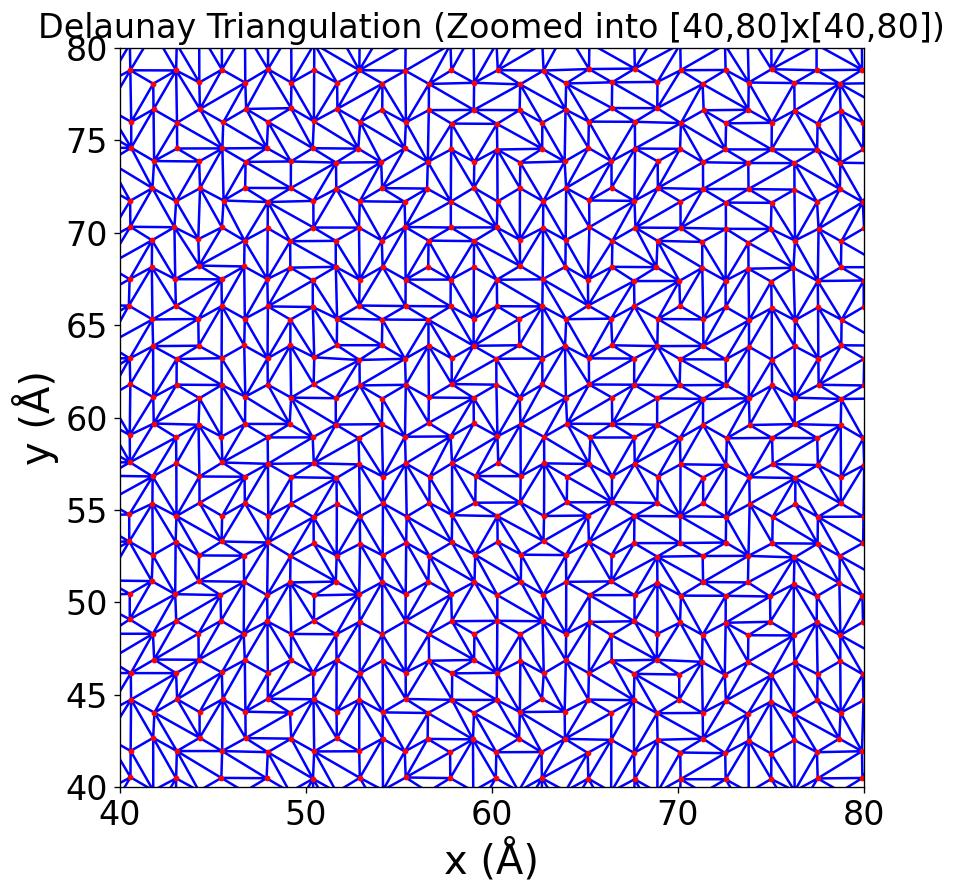

In [80]:
ref_config = 20
act_frames = len(x)-ref_config

points = np.column_stack((x[ref_config,:],y[ref_config,:]))

print(np.shape(points))


plt.figure(dpi=120, figsize=(8,8))
tri = scipy.spatial.Delaunay(points)  # Generate a triangulation of the points
plt.triplot(points[:, 0], points[:, 1], tri.simplices, color='blue')
plt.scatter(points[:, 0], points[:, 1], color='red', s=6.)
# plt.xlim(8, 32)  
# plt.ylim(8, 32) 
plt.xlim(40, 80)  
plt.ylim(40, 80)  
# plt.axis("square") 
plt.title("Delaunay Triangulation (Zoomed into [40,80]x[40,80])", fontsize=20)
plt.xlabel("x (Å)", fontsize=24)
plt.ylabel("y (Å)", fontsize=24)
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)

# plt.savefig("2bis.png")  # Saves as a PNG file
plt.show() 


max_area_allowed = 1.3 * 3 * 2*(1.42*np.sqrt(3)/2) * 1.42/2 
max_len_allowed  = 1.3 * 2 * 1.42*np.sqrt(3)/2

accepted_simplices = np.zeros(tri.simplices.shape[0], dtype=bool)

for i, simplex in enumerate(tri.simplices):  # Iterate through all triangles
    triangle = points[simplex]  # Get triangle vertices

    if True: #triangle_area(triangle) <= max_area_allowed and largest_triangle_side(triangle) <= max_len_allowed: 
        accepted_simplices[i] = True 

# print(accepted_simplices.shape) 
# print(tri.simplices[accepted_simplices].shape)
 
e_0    = np.zeros((len(accepted_simplices),3,2), dtype=np.float64) 
e_s_0  = np.zeros((len(accepted_simplices),3,2), dtype=np.float64) 
area_0 = np.zeros((len(accepted_simplices),1 ), dtype=np.float64) 

# print(accepted_simplices)

for i, simplex in enumerate(tri.simplices[accepted_simplices]):  # Iterate through all triangles
    triangle = points[simplex]  # Get triangle vertices

    vec = compute_unit_vectors(triangle)

    # print(i)
    
    # print(e_i)
    # print(e_i[0][0], e_i[0][1]) 
    # print(e_i[1][0], e_i[1][1])
    # print(e_i[2][0], e_i[2][1])

    e_0[i,:,:]   = vec[0] 
    e_s_0[i,:,:] = vec[1] 
    midpt_0      = vec[2] 
    area_0[i]    = triangle_area(triangle)
    # print(np.tensordot(e_i, e_i_s, axes=2))
    # print(np.dot(e_i[0,:], e_i_s[0,:]))
    # print(np.dot(e_i[1,:], e_i_s[1,:]))
    # print(np.dot(e_i[2,:], e_i_s[2,:]))
    
    # fact = 6
    
    # clear_output(wait=True)  # Clears the previous output in the notebook
    # plt.plot(triangle[:,0], triangle[:,1], '.r')  # Plot up to the i-th point
    
    # plt.plot([triangle[0,0], triangle[0,0]+fact*e_i[0][0]], [triangle[0,1] , triangle[0,1]+fact*e_i[0][1]], '-b') 
    # plt.plot([triangle[1,0], triangle[1,0]+fact*e_i[1][0]], [triangle[1,1] , triangle[1,1]+fact*e_i[1][1]], '-b') 
    # plt.plot([triangle[2,0], triangle[2,0]+fact*e_i[2][0]], [triangle[2,1] , triangle[2,1]+fact*e_i[2][1]], '-b') 
    
    # plt.plot([midpt[0,0], midpt[0,0]+fact*e_i_s[0][0]], [midpt[0,1] , midpt[0,1]+fact*e_i_s[0][1]], '-g') 
    # plt.plot([midpt[1,0], midpt[1,0]+fact*e_i_s[1][0]], [midpt[1,1] , midpt[1,1]+fact*e_i_s[1][1]], '-g') 
    # plt.plot([midpt[2,0], midpt[2,0]+fact*e_i_s[2][0]], [midpt[2,1] , midpt[2,1]+fact*e_i_s[2][1]], '-g') 
    
    # # plt.plot([e_i[6][0], e_i[6][0]+fact*e_i_s[3][0]], [e_i[6][1] , e_i[6][1]+fact*e_i_s[3][1]], '-g') 
    # # plt.plot([e_i[7][0], e_i[7][0]+fact*e_i_s[4][0]], [e_i[7][1] , e_i[7][1]+fact*e_i_s[4][1]], '-g') 
    # # plt.plot([e_i[8][0], e_i[8][0]+fact*e_i_s[5][0]], [e_i[8][1] , e_i[8][1]+fact*e_i_s[5][1]], '-g') 
    
    # plt.xlim(-5, 45)  # Set x-axis limits
    # plt.ylim(-5, 45)  # Set y-axis limits
    # plt.pause(0.2)            

# print(sum(accepted_simplices),len(accepted_simplices))

In [81]:
E    = np.zeros((act_frames, len(accepted_simplices), 2, 2), dtype=np.float64)
AvgE = np.zeros((act_frames, 2, 2), dtype=np.float64)
t0 = time.time()

for k in np.arange(0,act_frames):

    print(k)
    
    points = np.column_stack((x[k+ref_config,:],y[k+ref_config,:]))
    
    # e_t   = np.zeros((len(accepted_simplices),3,2), dtype=np.float64) 
    # e_s_t = np.zeros((len(accepted_simplices),3,2), dtype=np.float64) 
    
    # print(accepted_simplices)
    
    for i, simplex in enumerate(tri.simplices[accepted_simplices]):  # Iterate through all triangles
        triangle = points[simplex]  # Get triangle vertices

        # print(i)
            
        vec = compute_unit_vectors(triangle) 

        e_i_0   = e_0[i,:,:]
        e_i_s_0 = e_s_0[i,:,:]
        
        e_i_t   = vec[0]
        e_i_s_t = vec[1]
        midpt_0 = vec[2] 

        # print(e_i_t,e_i_t[0,:],np.dot(e_i_t[0,:], e_i_t[0,:]))
        
        Q = np.zeros((3,1), dtype=np.float64) 
        for j in range(3):
            Q[j] = 0.5 * ( np.dot(e_i_t[j,:], e_i_t[j,:]) - np.dot(e_i_0[j,:], e_i_0[j,:]) )
        # print("Q",Q)
        
        # print(k,i)
        E[k,i,:,:] = -1./8./area_0[i] * ( (Q[0]-Q[1]-Q[2]) * np.tensordot(e_i_s_0[0,:], e_i_s_0[0,:], axes=0) 
                                        + (Q[1]-Q[0]-Q[2]) * np.tensordot(e_i_s_0[1,:], e_i_s_0[1,:], axes=0) 
                                        + (Q[2]-Q[0]-Q[1]) * np.tensordot(e_i_s_0[2,:], e_i_s_0[2,:], axes=0)
                                        ) 
        # print(E[k,i,:,:])
        # plt.pause(2)

AvgE[:,:,:] = np.sum(E[:,:,:,:], axis=1)/Natoms
tf = time.time()
print("It took", tf-t0, "s") 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
It took 122.50171685218811 s


In [82]:
print(np.shape(E),np.shape(area_0))
# print(np.sum(E[:,:,:,:]*area_0[:], axis=1))

total_area = np.sum(area_0)

print(total_area, min(x[0,:]), max(x[0,:]), (max(x[0,:])-min(x[0,:]))*(max(y[0,:])-min(y[0,:])) )

for k in range(np.shape(E)[0]):
    for i in range(2):
        for j in range(2):
            # print(np.shape(E[k,:,i,j]),np.shape(area_0[:, 0]))
            AvgE[k,i,j] = np.sum(E[k,:,i,j]*area_0[:, 0])/total_area

(101, 9144, 2, 2) (9144, 1)
11796.858845735002 11.07 119.31 11760.481656


In [83]:
# print(np.sum(E[:,:,:,:], axis=1).shape)
print(AvgE.shape)
print(AvgE[:,0,0]) 
print(AvgE[:,1,1]) 

(101, 2, 2)
[0.         0.00734686 0.00814373 0.00958977 0.01191658 0.01262363
 0.01475101 0.01507393 0.01760436 0.01872465 0.02083385 0.02335953
 0.02406346 0.02484772 0.02686335 0.02901903 0.02912804 0.02979286
 0.03221891 0.03433734 0.03664522 0.03684733 0.03854135 0.04075846
 0.04129841 0.04284213 0.04476537 0.04564989 0.0479596  0.05005369
 0.05069711 0.0537558  0.05408923 0.05576638 0.0570547  0.05864148
 0.05952966 0.06091857 0.06304835 0.06484403 0.06669446 0.06894462
 0.06971174 0.07176734 0.07215874 0.07436586 0.07674463 0.07755896
 0.07875555 0.08125899 0.08187738 0.08291169 0.08626246 0.08719459
 0.08907681 0.09022461 0.09196036 0.09434313 0.09566344 0.09772259
 0.09841985 0.09988561 0.10359354 0.10348782 0.10627267 0.10814466
 0.10997411 0.11102417 0.11306824 0.11436775 0.11763284 0.11833649
 0.11928098 0.12058565 0.12227736 0.12494103 0.12763872 0.12856896
 0.13233566 0.13240018 0.13582792 0.1356449  0.13990052 0.13894396
 0.13926184 0.14558677 0.1432133  0.14452843 0.146

(121, 4584) 51
(121, 4584) 51
(121, 4584) 51


C:\Users\user\AppData\Local\Temp\ipykernel_17400\1632069621.py:80: RuntimeWarning: invalid value encountered in scalar divide
  nu = -AvgE[f,1,1]/(AvgE[f,0,0])


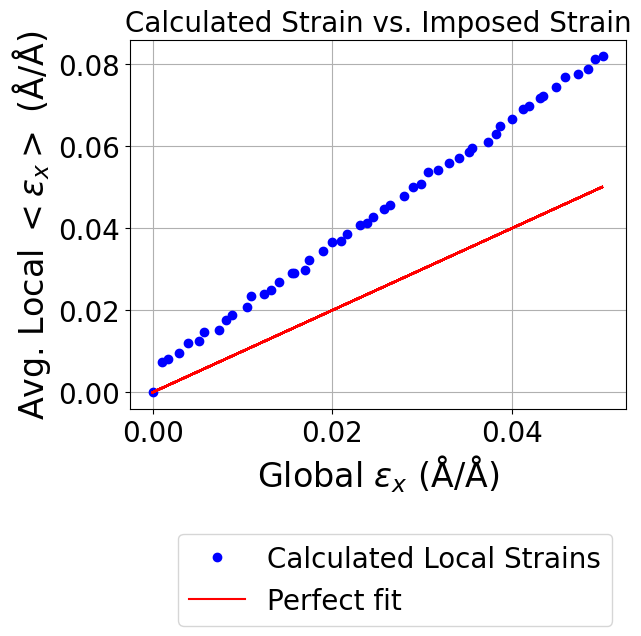

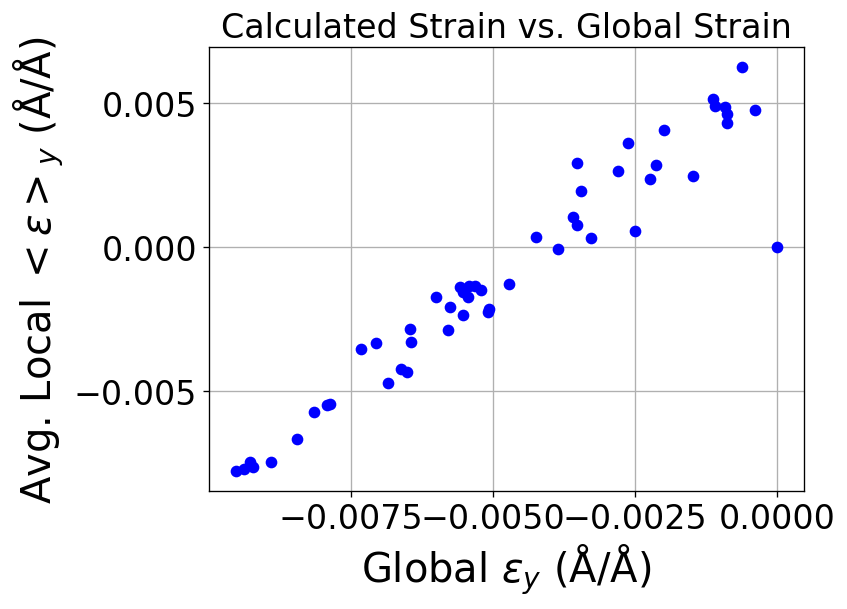

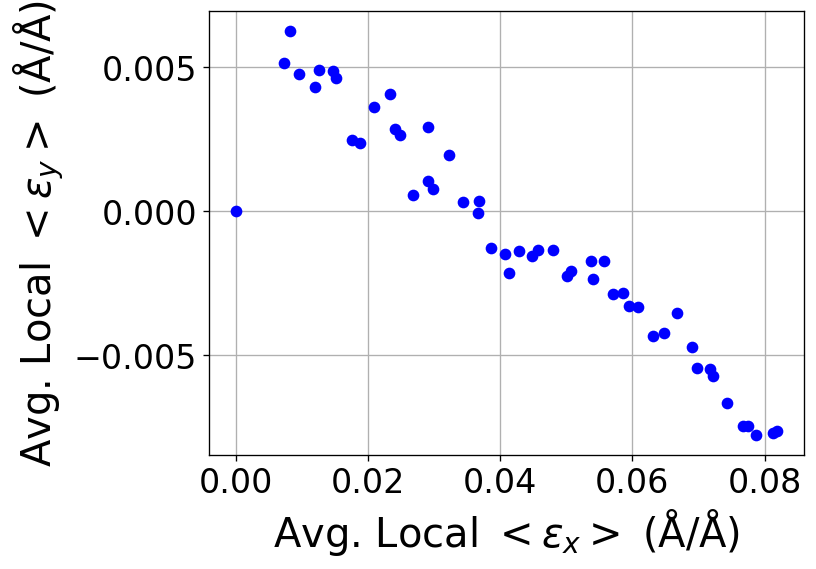

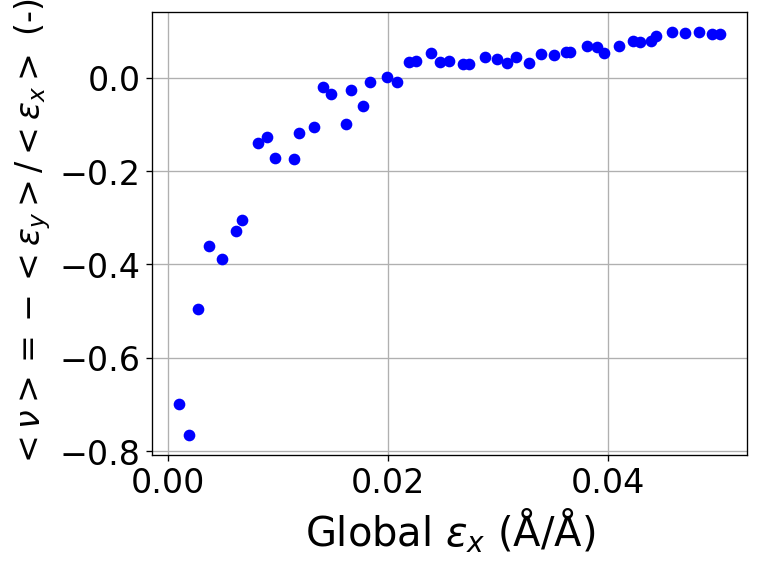

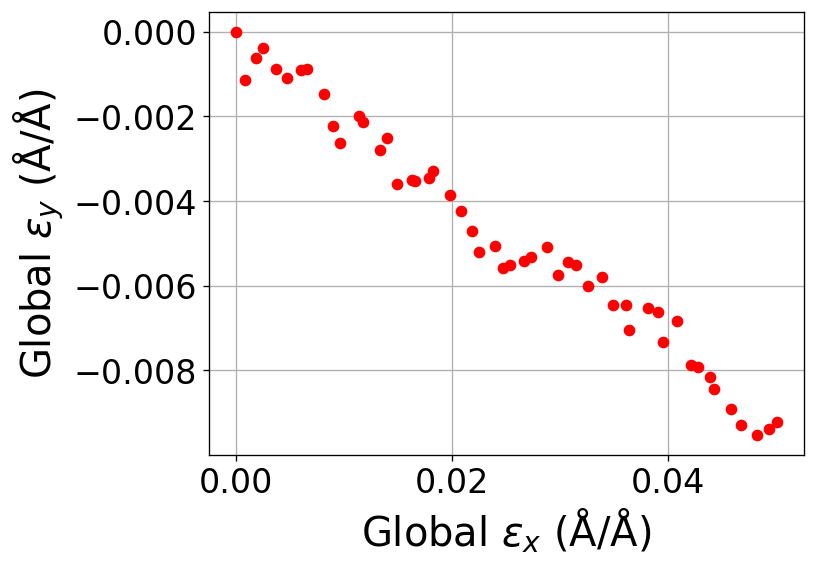

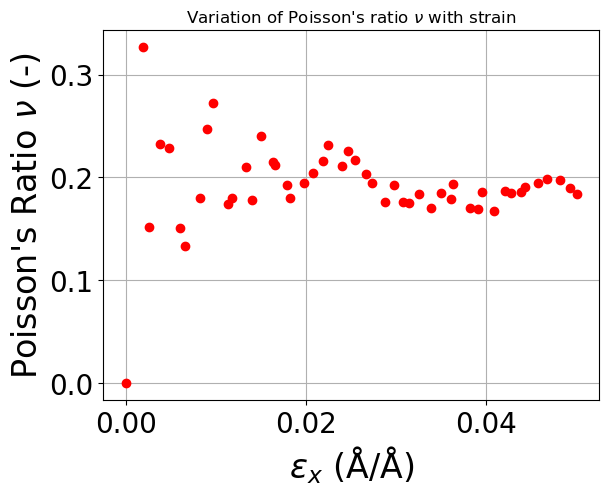

In [118]:
plt.figure() #dpi=120

max_strain = 0.05

for f in range(act_frames):
    a=(max(x[ref_config,:])-min(x[ref_config,:]))
    b=(max(x[f+ref_config,:])-min(x[f+ref_config,:]))
    
    plt.plot((b-a)/a, AvgE[f,0,0], 'bo', markersize=6)
    plt.plot([0,max_strain], [0, max_strain], 'r') 
plt.xlabel(r'Global $\varepsilon _x$ (Å/Å)', fontsize=24) 
plt.ylabel(r'Avg. Local $<\varepsilon _x>$ (Å/Å)', fontsize=24) 
plt.title(r"Calculated Strain vs. Imposed Strain", fontsize=20)
plt.legend(["Calculated Local Strains", "Perfect fit"], loc="best", fontsize=20, bbox_to_anchor= (1, -0.3))
plt.grid() 
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
plt.savefig("calc-strain.png") 

    # a=(max(y[149,:])-min(y[149,:]))
    # b=(max(y[f+149,:])-min(y[f+149,:]))
    # print(a,b,(b-a)/a) 

plt.figure(dpi=120)

print(np.shape(y), act_frames) 

for f in range(act_frames):
    a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
    b10 = np.mean(heapq.nlargest(3, y[f+frame0,:])) - np.mean(heapq.nsmallest(3, y[f+frame0,:])) 
    eps3 = (b10-a10)/a10
    # print(a10,b10,eps3) 
    # a=(max(y[ref_config,:])-min(y[ref_config,:]))
    # b=(max(y[f+ref_config,:])-min(y[f+ref_config,:]))
    
    plt.plot(eps3, AvgE[f,1,1], 'bo', markersize=6)
    # plt.plot([0,-max_strain/5], [0, -max_strain/5], 'r') 
plt.xlabel(r'Global $\varepsilon _y$ (Å/Å)', fontsize=24) 
plt.ylabel(r'Avg. Local $<\varepsilon> _y$ (Å/Å)', fontsize=24) 
plt.title(r"Calculated Strain vs. Global Strain", fontsize=20)
plt.grid()
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
plt.savefig("calc-strain-y.png") 


plt.figure(dpi=120)

print(np.shape(y), act_frames) 

for f in range(act_frames):
    a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
    b10 = np.mean(heapq.nlargest(3, y[f+frame0,:])) - np.mean(heapq.nsmallest(3, y[f+frame0,:])) 
    eps3 = (b10-a10)/a10
    # print(a10,b10,eps3) 
    # a=(max(y[ref_config,:])-min(y[ref_config,:]))
    # b=(max(y[f+ref_config,:])-min(y[f+ref_config,:]))
    
    plt.plot(AvgE[f,0,0], AvgE[f,1,1], 'bo', markersize=6)
    # plt.plot([0,-max_strain/5], [0, -max_strain/5], 'r') 
plt.xlabel(r'Avg. Local $<\varepsilon _x>$ (Å/Å)', fontsize=24) 
plt.ylabel(r'Avg. Local $<\varepsilon _y>$ (Å/Å)', fontsize=24) 
plt.grid()
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)


plt.figure(dpi=120)

print(np.shape(y), act_frames) 

for f in range(act_frames):
    a10 = np.mean(heapq.nlargest(3, x[frame0,:])) - np.mean(heapq.nsmallest(3, x[frame0,:])) 
    b10 = np.mean(heapq.nlargest(3, x[f+frame0,:])) - np.mean(heapq.nsmallest(3, x[f+frame0,:])) 
    eps3 = (b10-a10)/a10
    # print(a10,b10,eps3) 
    # a=(max(y[ref_config,:])-min(y[ref_config,:]))
    # b=(max(y[f+ref_config,:])-min(y[f+ref_config,:]))

    nu = -AvgE[f,1,1]/(AvgE[f,0,0])
    
    if nu > 0.5 or nu < -1:
        continue

    plt.plot(eps3, nu, 'bo', markersize=6)
    # plt.plot([0,-max_strain/5], [0, -max_strain/5], 'r') 
plt.xlabel(r'Global $\varepsilon _x$ (Å/Å)', fontsize=24) # r'Avg. Local $<\varepsilon _x>$ (Å/Å)'
plt.ylabel(r"$<\nu>=-<\varepsilon _y>/<\varepsilon _x>$ (-)", fontsize=20) 
plt.grid() 
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)

plt.figure(dpi=120)

for f in range(act_frames):
    # ay=(max(y[ref_config,:])-min(y[ref_config,:]))
    # by=(max(y[f+ref_config,:])-min(y[f+ref_config,:]))
    f = f + frame0  # We don t use AvgE here so I can do this
    a10 = np.mean(heapq.nlargest(1, x[frame0,:])) - np.mean(heapq.nsmallest(1, x[frame0,:])) 
    b10 = np.mean(heapq.nlargest(1, x[f,:])) - np.mean(heapq.nsmallest(1, x[f,:])) 
    epsx = (b10-a10)/a10
    # ax=(max(x[ref_config,:])-min(x[ref_config,:]))
    # bx=(max(x[f+ref_config,:])-min(x[f+ref_config,:]))
    a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
    b10 = np.mean(heapq.nlargest(3, y[f,:])) - np.mean(heapq.nsmallest(3, y[f,:])) 
    epsy = (b10-a10)/a10
    
    # print(epsx,epsy)
    
    plt.plot(epsx, epsy, 'ro--')
    # plt.plot([0,-0.02], [0, -0.02], 'r') 
plt.xlabel(r'Global $\varepsilon _x$ (Å/Å)', fontsize=24) 
plt.ylabel(r'Global $\varepsilon _y$ (Å/Å)', fontsize=24) 
plt.grid()
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)



## 5
plt.figure()

for f in range(act_frames):
    # a=(max(x[ref_config,:])-min(x[ref_config,:]))
    # b=(max(x[f+ref_config,:])-min(x[f+ref_config,:]))

    f = f + frame0  # We don t use AvgE here so I can do this
    a10 = np.mean(heapq.nlargest(1, x[frame0,:])) - np.mean(heapq.nsmallest(1, x[frame0,:])) 
    b10 = np.mean(heapq.nlargest(1, x[f,:])) - np.mean(heapq.nsmallest(1, x[f,:])) 
    epsx = (b10-a10)/a10
    
    a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
    b10 = np.mean(heapq.nlargest(3, y[f,:])) - np.mean(heapq.nsmallest(3, y[f,:])) 
    epsy = (b10-a10)/a10

    nu = - epsy / (epsx+1e-12)

    if nu > 0.35 or nu < -1:
        continue
    
    # plt.plot((b-a)/a, AvgE[f,1,1], 'ro--')
    plt.plot(epsx, nu, 'ro--')
plt.title(r"Variation of Poisson's ratio $\nu$ with strain")
plt.xlabel(r'$\varepsilon _x$ (Å/Å)', fontsize=24) 
plt.ylabel(r"Poisson's Ratio $\nu$ (-)", fontsize=24) 
plt.grid("on")
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)

# plt.savefig("nu-eps.png")


In [85]:
GblE = np.zeros((act_frames, 2, 2), dtype=np.float64)

for f in range(act_frames):
    # f = f + frame0  # We don t use AvgE here so I can do this
    a10 = np.mean(heapq.nlargest(1, x[frame0,:])) - np.mean(heapq.nsmallest(1, x[frame0,:])) 
    b10 = np.mean(heapq.nlargest(1, x[f+frame0,:])) - np.mean(heapq.nsmallest(1, x[f+frame0,:])) 
    epsx = (b10-a10)/a10
    # ax=(max(x[ref_config,:])-min(x[ref_config,:]))
    # bx=(max(x[f+ref_config,:])-min(x[f+ref_config,:]))
    a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
    b10 = np.mean(heapq.nlargest(3, y[f+frame0,:])) - np.mean(heapq.nsmallest(3, y[f+frame0,:])) 
    epsy = (b10-a10)/a10
    
    GblE[f,0,0] = epsx
    GblE[f,1,1] = epsy 

In [86]:
with open('Lx.pkl', 'wb') as f:
    pickle.dump(AvgE, f)
    pickle.dump(GblE, f)
    

In [3]:
act_frames = 51

GE = np.zeros((4, act_frames, 2, 2), dtype=np.float64)
AE = np.zeros((4, act_frames, 2, 2), dtype=np.float64)

for i in range(4):
    with open("L"+str(i+1)+".pkl", 'rb') as f: 
        AE[i, :, :, :] = pickle.load(f)[:51, :, :]
        GE[i, :, :, :] = pickle.load(f)[:51, :, :]

C:\Users\user\AppData\Local\Temp\ipykernel_44116\733292603.py:13: RuntimeWarning: invalid value encountered in scalar divide
  nu[f] = -AE[i,f,1,1]/(AE[i,f,0,0])


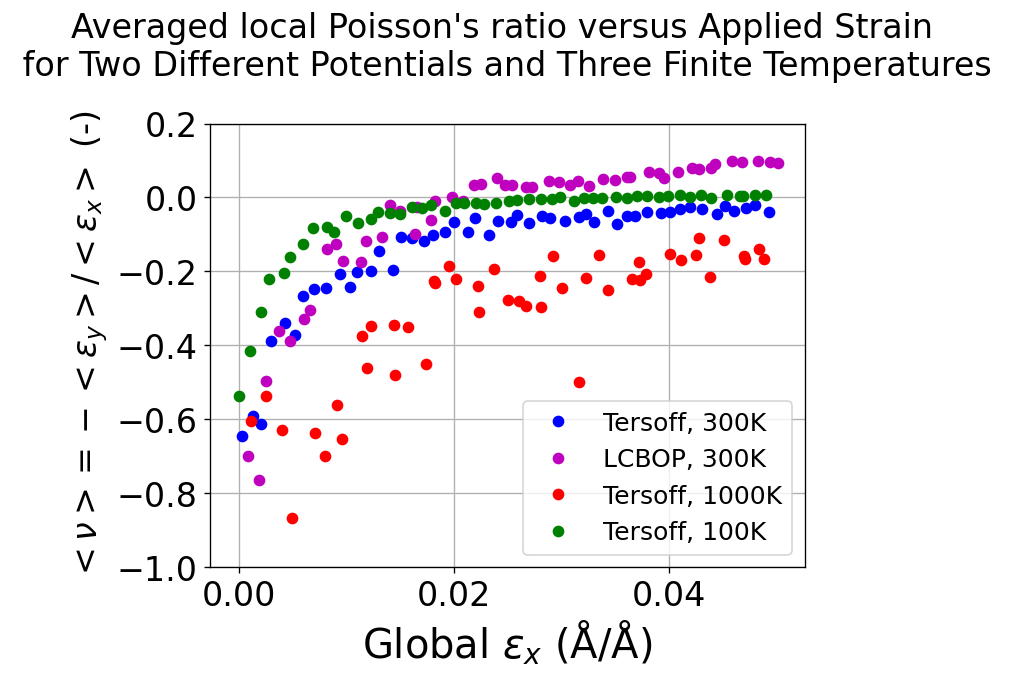

In [4]:
plt.figure(dpi=120)

# print(np.shape(y), act_frames) 

color = ['b', 'm', 'r', 'g']

for i in range(4):

    epsx = GE[i,:,0,0]

    nu = np.zeros(len(epsx))
    for f in range(act_frames):
        nu[f] = -AE[i,f,1,1]/(AE[i,f,0,0])
        
        # if nu[f] > 0.5 or nu[f] < -1:
        #     nu[f] = 0 # continue
    
    plt.plot(epsx, nu, 'o', color=color[i], markersize=6)
        # plt.plot([0,-max_strain/5], [0, -max_strain/5], 'r') 
plt.xlabel(r'Global $\varepsilon _x$ (Å/Å)', fontsize=24) # r'Avg. Local $<\varepsilon _x>$ (Å/Å)'
plt.ylabel(r"$<\nu>=-<\varepsilon _y>/<\varepsilon _x>$ (-)", fontsize=20) 
plt.ylim([-1., 0.2])
plt.legend(["Tersoff, 300K", "LCBOP, 300K", "Tersoff, 1000K", "Tersoff, 100K"], fontsize=15, loc="lower right") # , bbox_to_anchor=(1, -0.4)
plt.title("Averaged local Poisson's ratio versus Applied Strain \n for Two Different Potentials and Three Finite Temperatures \n", fontsize=20)
plt.grid() 
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
plt.savefig("rests.png")

C:\Users\user\AppData\Local\Temp\ipykernel_44116\2258894372.py:13: RuntimeWarning: invalid value encountered in scalar divide
  nu[f] = -GE[i,f,1,1]/(GE[i,f,0,0])


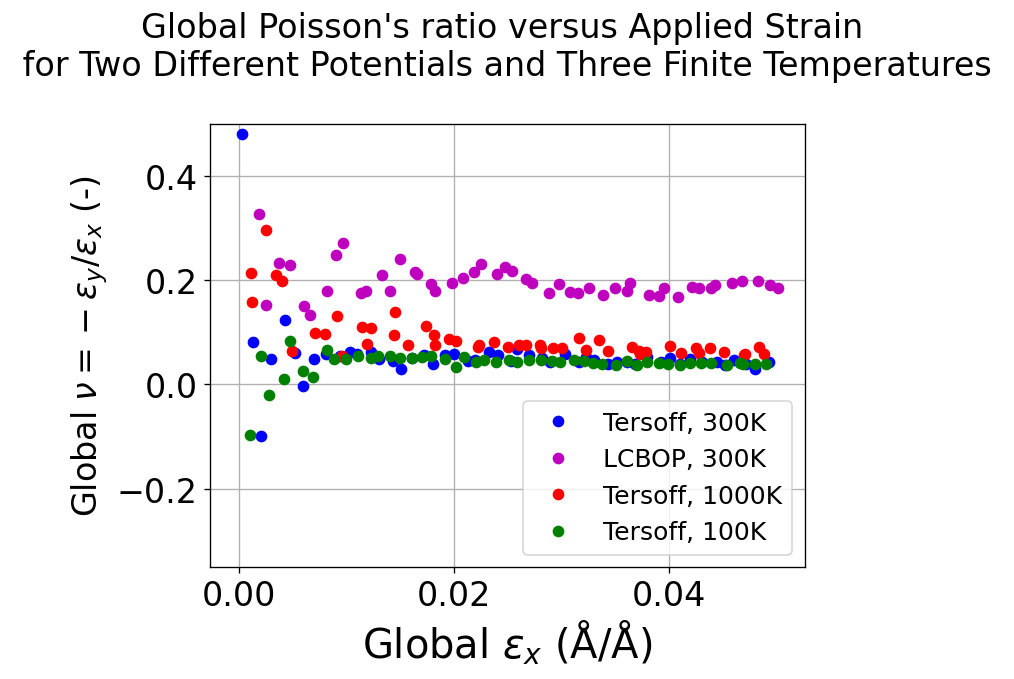

In [11]:
plt.figure(dpi=120)

# print(np.shape(y), act_frames) 

color = ['b', 'm', 'r', 'g']

for i in range(4):

    epsx = GE[i,:,0,0]

    nu = np.zeros(len(epsx))
    for f in range(act_frames):
        nu[f] = -GE[i,f,1,1]/(GE[i,f,0,0])
        
        # if nu[f] > 0.5 or nu[f] < -1:
        #     nu[f] = 0 # continue
    
    plt.plot(epsx, nu, 'o', color=color[i], markersize=6)
        # plt.plot([0,-max_strain/5], [0, -max_strain/5], 'r') 
plt.xlabel(r'Global $\varepsilon _x$ (Å/Å)', fontsize=24) # r'Avg. Local $<\varepsilon _x>$ (Å/Å)'
plt.ylabel(r"Global $\nu=-\varepsilon _y/\varepsilon _x$ (-)", fontsize=20) 
plt.ylim([-0.35, 0.5])
plt.legend(["Tersoff, 300K", "LCBOP, 300K", "Tersoff, 1000K", "Tersoff, 100K"], fontsize=15, loc="lower right") # , bbox_to_anchor=(1, -0.4)
plt.title("Global Poisson's ratio versus Applied Strain \n for Two Different Potentials and Three Finite Temperatures \n", fontsize=20)
plt.grid() 
ax = plt.gca()
ax.tick_params(axis='both', labelsize=20)
plt.savefig("rests.png")

In [526]:
# def model(x, c1, c2):
#     return c1 * np.tanh(x) + c2

# a10 = np.mean(heapq.nlargest(1, x[frame0,:])) - np.mean(heapq.nsmallest(1, x[frame0,:])) 
# b10 = np.mean(heapq.nlargest(1, x[frame0:-1,:])) - np.mean(heapq.nsmallest(1, x[frame0:-1,:])) 
# epsx = (b10-a10)/a10

# a10 = np.mean(heapq.nlargest(3, y[frame0,:])) - np.mean(heapq.nsmallest(3, y[frame0,:])) 
# b10 = np.mean(heapq.nlargest(3, y[frame0:-1,:])) - np.mean(heapq.nsmallest(3, y[frame0:-1,:])) 
# epsy = (b10-a10)/a10

# nu = - epsy / (epsx+1e-12)

# popt, pcov = curve_fit(model, epsx, nu, p0=[1, 0])  # Initial guess for [c1, c2]

# # Extract fitted parameters
# c1_fit, c2_fit = popt
# print(f"Fitted Parameters: c1 = {c1_fit:.3f}, c2 = {c2_fit:.3f}")

# # Plot data and fitted function
# plt.scatter(epsx, nu, label="Data", color="red")
# plt.plot(epsx, model(epsx, *popt), label="Fitted Curve", color="blue")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend()
# plt.title("Nonlinear Fit: y = c1 * tanh(x) + c2")
# plt.show()

In [344]:
print(act_frames,frame0)

61 19


In [247]:
# print(tri.simplices[accepted_simplices].shape)

(1339, 3)


In [144]:
# print(e_i[0,:])
# # print(e_i_s)
# # print(e_i[0,:],e_i_s[0,:])
# print(np.tensordot(e_i[0,:], e_i[0,:], axes=0))
# print(np.dot(e_i[1,:], e_i_s[1,:]))
# print(np.dot(e_i[2,:], e_i_s[2,:]))

[-0.99973893 -0.02284875]
[[9.99477935e-01 2.28427867e-02]
 [2.28427867e-02 5.22065455e-04]]
0.0
0.0
